
## Week 9 handin
### 01 Assignment

`Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'`
### Download the data

- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.

### Feature engineering
- Reduce the dataset by:
  - Make == Honda
  - Fueltype == Gasoline
  - Remove outliers. Hint: `df[column name'] < df['column name'].quantile(0.90)`
  - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
  - Normalize data (reduce values to be between 0 and 1)
  
### Linear regression

- Perform linear regression where x = horsepower and y = mpg
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is `y` when `x=1`.
- Show the regression line on a scatterplot with the other datapoints.

### 02 Status
Completed except the one with outliers.

I am a bit confused about the outliers when we also normalize the data.
Maybe I have misunderstood something. 

### 03 Solutions

In [56]:
# imports 
import pandas as pd
import sklearn
from sklearn import preprocessing
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt

# Download the data

In [5]:
## Programatically download data 
data = pd.read_csv('https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv')

# Import the data into a Pandas dataframe 
dataFrame = pd.DataFrame(data)
# Show the head of the dataframe 
dataFrame.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


# Feature engineering


In [69]:
# Reduce the dataset by: 

#Make == honda  
honda = dataFrame[dataFrame["Identification.Make"] == "Honda"]

#Fueltype == gasoline and make == honda 
gasoline = dataFrame[dataFrame["Fuel Information.Fuel Type"] == "Gasoline"]

#Remove outliers 
#Hint ???: df[column name'] < df['column name'].quantile(0.90)
#outliers = gasoline[gasoline] < dataFrame['Fuel Information.Fuel Type'].quantile(0.90)

#Only use 2 features : 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
features = gasoline[['Fuel Information.Highway mpg', 'Engine Information.Engine Statistics.Horsepower']]

#Normalize data (reduce values to be between 0 and 1)
scaler = preprocessing.MinMaxScaler()
names = features.columns
d = scaler.fit_transform(features)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()



,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower
0,0.057143,0.278810
1,0.071429,0.185874
2,0.080952,0.185874
3,0.071429,0.185874
4,0.071429,0.185874


# Linear regression

Coef:  [-0.08830606]
The coef contain the coefficients for the prediction of each of the targets.
Aka how much the graph change everytime x changes. 

When X = 1, Y will be -0.003833399306443136 according to our model 


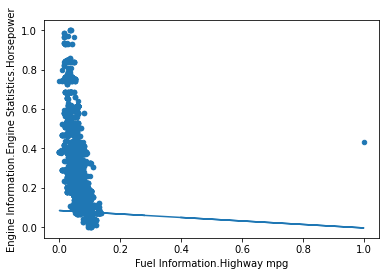

In [67]:
# Perform linear regression where x = horsepower and y = mpg

xs = scaled_df['Engine Information.Engine Statistics.Horsepower']
ys = scaled_df['Fuel Information.Highway mpg']

xs_reshape = np.array(xs).reshape(-1, 1)

model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)

# What is the coefficient (slope) of your model? What does this number mean? 
print("Coef: ", model.coef_ , )
print("The coef contain the coefficients for the prediction of each of the targets.")
print("Aka how much the graph change everytime x changes.", "\n")

# According to your model, what is y when x=1. 
predicted = model.predict(xs_reshape)
xwheny1 = model.predict([[1]])
print('When X = 1, Y will be {} according to our model '.format(xwheny1[0]))

# Show the regression line on a scatterplot with the other datapoints.
scaled_df.plot.scatter(x = 0, y = 1)

m, b = np.polyfit(xs, ys, 1)
plt.plot(xs, m*xs + b)
